In [15]:
import pandas as pd
import plotly.express as px

In [16]:
# Daten laden
df = pd.read_csv('../data/processed/df_cleaned_full.csv', parse_dates=['chart_week'])

# SAISONALITÄT

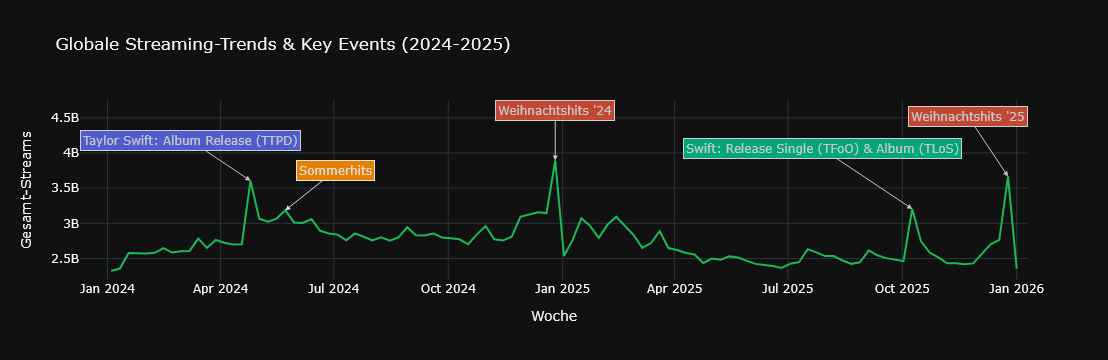

In [17]:
# Aggregieren der gesamten Streams pro Woche
seasonal_trends = df.groupby('chart_week')['streams'].sum().reset_index()

# Plotting
fig = px.line(seasonal_trends, 
              x='chart_week', 
              y='streams',
              title='Globale Streaming-Trends & Key Events (2024-2025)',
              labels={'streams': 'Gesamt-Streams', 'chart_week': 'Woche'},
              template='plotly_dark')

# Kommentare in die Grafik einfügen
# Taylor Swift April 2024
fig.add_annotation(x="2024-04-25", 
                    y=3605841989,
                    text="Taylor Swift: Album Release (TTPD)",
                    showarrow=True, arrowhead=2, opacity=0.8,
                    ax=-60, ay=-40, bgcolor="#636EFA", bordercolor="white")

# Sommerhits
fig.add_annotation(x="2024-05-23", 
                    y=3184277186,
                    text="Sommerhits",
                    showarrow=True, arrowhead=2, opacity=0.9,
                    ax=50, ay=-40, bgcolor="#FF8C00", bordercolor="white")

# Saisonale Rückkehr der Weihnachtshits
fig.add_annotation(x="2024-12-26", y=3893017659,
            text="Weihnachtshits '24",
            showarrow=True, arrowhead=2, opacity=0.8,
            ax=0, ay=-50, bgcolor="#EF553B", bordercolor="white")

# Der massive Oktober-Peak 2025
fig.add_annotation(x="2025-10-09", y=3205166486,
            text="Swift: Release Single (TFoO) & Album (TLoS)",
            showarrow=True, arrowhead=2, opacity=0.8,
            ax=-90, ay=-60, bgcolor="#00CC96", bordercolor="white")

fig.add_annotation(x="2025-12-25", y=3667133246,
            text="Weihnachtshits '25",
            showarrow=True, arrowhead=2, opacity=0.8,
            ax=-40, ay=-60, bgcolor="#EF553B", bordercolor="white")

# Optik verfeinern
fig.update_traces(line_color='#1DB954', line_width=2)

fig.show()

###### Abkürzungen
###### **TTPD:** The Tortured Poets Department (Album)
###### **TFoO:** The Fate of Ophelia (Single)
###### **TLoS:** The Life of a Showgirl (Album)

In [18]:
# PEAKS CHECKEN
# Durchschnitt und Standardabweichung der Streams berechnen
mean_streams = seasonal_trends['streams'].mean()
std_streams = seasonal_trends['streams'].std()

# Threshold definieren: alles, was mehr als 1.5 Standardabweichungen über dem Durchschnitt liegt
threshold = mean_streams + 1.5 * std_streams

# Peak-Wochen identifizieren
peaks = seasonal_trends[seasonal_trends['streams'] > threshold]
print(f"Es wurden {len(peaks)} signifikante Peaks identifiziert:")
print(peaks[['chart_week', 'streams']])

Es wurden 6 signifikante Peaks identifiziert:
    chart_week     streams
16  2024-04-25  3605841989
20  2024-05-23  3184277186
49  2024-12-12  3157270020
51  2024-12-26  3893017659
92  2025-10-09  3205166486
103 2025-12-25  3667133246


In [19]:
# URSACHEN DER PEAKS

# Liste der identifizierten Peak-Wochen erstellen
peak_dates = peaks['chart_week'].tolist()

for date in peak_dates:
    # Original DF auf die jeweiligen Wochen filtern
    weekly_data = df[df['chart_week'] == date]

    # TOP 5 Songs dieser Woche nach Streams anzeigen
    top_5 = weekly_data.sort_values(by='streams', ascending=False).head(5)

    # Berechnung: Wie viel Prozent der Top 200 Streams (200 = Grenze für Charterfolg) macht Platz 1 aus?
    total_weekly_streams = weekly_data['streams'].sum()
    top_1_share = (top_5.iloc[0]['streams'] / total_weekly_streams) * 100

    print(f"\nWoche: {date.date()}")
    print(f"Top 1 Share: {top_1_share:.2f} % der gesamten Chart-Streams")
    print(top_5[['rank', 'artist_names', 'track_name', 'streams']])
    print("-" * 50)


Woche: 2024-04-25
Top 1 Share: 2.85 % der gesamten Chart-Streams
      rank               artist_names                       track_name  \
3200     1  Taylor Swift, Post Malone    Fortnight (feat. Post Malone)   
3201     2               Taylor Swift                         Down Bad   
3202     3                    Artemas       i like the way you kiss me   
3203     4               Taylor Swift                  So Long, London   
3204     5               Taylor Swift  I Can Do It With a Broken Heart   

        streams  
3200  102878399  
3201   66123951  
3202   62659568  
3203   61238184  
3204   61235217  
--------------------------------------------------

Woche: 2024-05-23
Top 1 Share: 2.23 % der gesamten Chart-Streams
      rank       artist_names           track_name   streams
4000     1      Tommy Richman  MILLION DOLLAR BABY  70978525
4001     2      Billie Eilish                LUNCH  65579921
4002     3  Sabrina Carpenter             Espresso  63967981
4003     4     Kendr

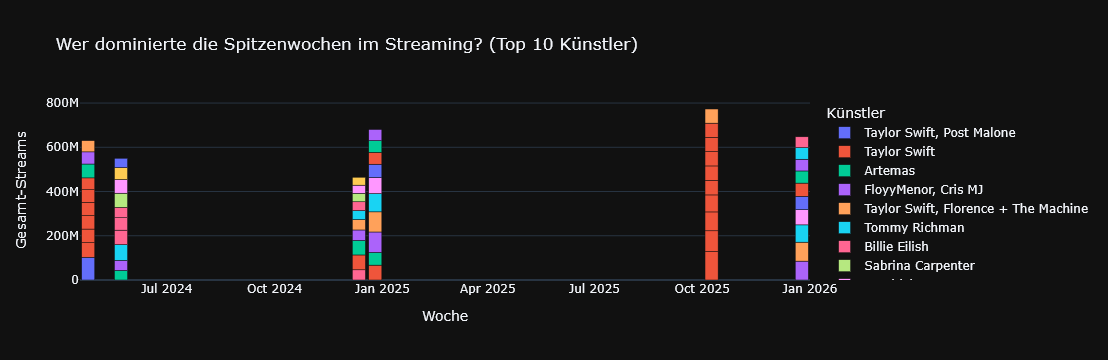

In [20]:
# Visualisierung der TOP 10 Künstler in den Peak-Wochen
peak_df_details = df[df['chart_week'].isin(peak_dates)]
top_artists_peaks = peak_df_details[peak_df_details['rank'] <= 10]

fig = px.bar(top_artists_peaks, 
             x='chart_week',
             y='streams',
             color='artist_names',
             title='Wer dominierte die Spitzenwochen im Streaming? (Top 10 Künstler)',
             hover_data=['track_name'],
             labels={
                 'streams': 'Gesamt-Streams', 
                 'chart_week': 'Woche',
                 'artist_names': 'Künstler'
             },
             template='plotly_dark')

fig.show()
            

## Zusammenfassung der Ergebnisse

### 1. "Superstar-Releases" (Taylor Swift)
#### Wochen: April 2024 & Oktober 2025

**April 2024:** Der Peak wird durch das Release von "The Tortured Poets Department" getrieben. Allein der Top-Song "Fortnight" generiert über 102 Mio. Streams. Taylor Swift belegt fast die gesamten Top 5.

**Oktober 2025:** Dies ist der massivste Ausschlag in deinem gesamten Datensatz. Mit einem Top 1 Share von 4,02 % (fast doppelt so hoch wie an Weihnachten!) sehen wir hier einen fiktiven oder massiven Überraschungs-Release ("The Fate of Ophelia").

**Insight:** Diese Peaks sind "Anomalien", die nicht organisch wachsen, sondern wie eine Schockwelle ins System eintreten.

### 2. "Weihnachtshits" (Zyklische Saisonalität)
#### Wochen: Dezember 2024 & Dezember 2025

**Muster:** Ende Dezember übernehmen die Klassiker die Charts. Mariah Carey und Wham! verdrängen die aktuellen Pophits fast vollständig aus den Top 5.

**Dynamik:** Interessant ist der Vergleich: Während Mariah Carey 2024 mit 92,5 Mio. Streams vorne lag, führt 2025 Wham! ("Last Christmas") mit 85,8 Mio. Streams.

**Insight:** Das Streaming-Volumen ist an Weihnachten extrem hoch, aber die Vielfalt (Diversity) sinkt, da alle Nutzer dieselben 10–20 Klassiker hören.

### 3. "Sommer-Hits" & Organisches Wachstum
#### Woche: Mai 2024

**Charakter:** Im Gegensatz zu den Swift-Peaks sehen wir hier eine bunte Mischung: Tommy Richman (Viral-Hit), Billie Eilish (Album-Release), Sabrina Carpenter (Sommerhit) und Kendrick Lamar (Pop-Fehde/Diss-Track).

**Insight:** Dies ist die "gesündeste" Form eines Peaks. Das hohe Volumen verteilt sich auf verschiedene Künstler und Genres. Der Top 1 Share ist mit 2,23 % relativ niedrig, was auf einen harten Wettbewerb hindeutet.

# TOP-KÜNSTLER PRO WOCHE

In [21]:
# TOP 10 Künstler pro Woche
top_artists_weekly = df[df['rank'] <= 10].groupby(['chart_week', 'artist_names'])['streams'].sum().reset_index()

# Anzahl eines Künstlers in den TOP 10 pro Woche
top_artists_count = top_artists_weekly.groupby(['chart_week', 'artist_names']).size().reset_index(name='dominance')
# HINWEIS: 'dominance' als Vorbereitung für die Genre-Analyse, um dort alle Künstler mit dem Genre Pop zählen zu können.

# Sortieren nach Datum
top_artists_count = top_artists_count.sort_values('chart_week') 
display(top_artists_count.head())


,chart_week,artist_names,dominance
0,2024-01-04,Doja Cat,1
1,2024-01-04,Jack Harlow,1
2,2024-01-04,"Jung Kook, Latto",1
3,2024-01-04,Mitski,1
4,2024-01-04,"Peso Pluma, Anitta",1


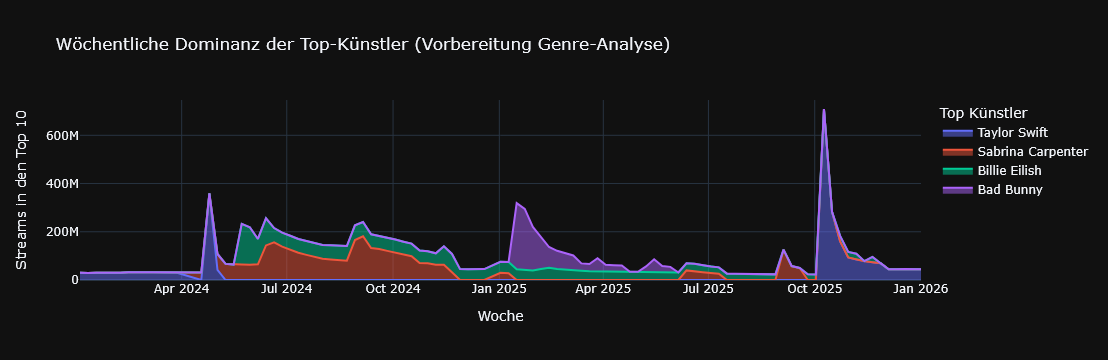

In [22]:
# auf TOP 5 filtern für eine übersichtlichere Grafik
top_overall_artists = df.groupby('artist_names')['streams'].sum().nlargest(5).index
df_filtered = top_artists_weekly[top_artists_weekly['artist_names'].isin(top_overall_artists)]

fig_area = px.area(df_filtered, 
                   x="chart_week", 
                   y="streams", 
                   color="artist_names",
                   title="Wöchentliche Dominanz der Top-Künstler (Vorbereitung Genre-Analyse)",
                   labels={
                       'streams': 'Streams in den Top 10', 
                       'chart_week': 'Woche',
                       'artist_names': 'Top Künstler'},
                   template="plotly_dark",
                   line_group="artist_names")

fig_area.show()


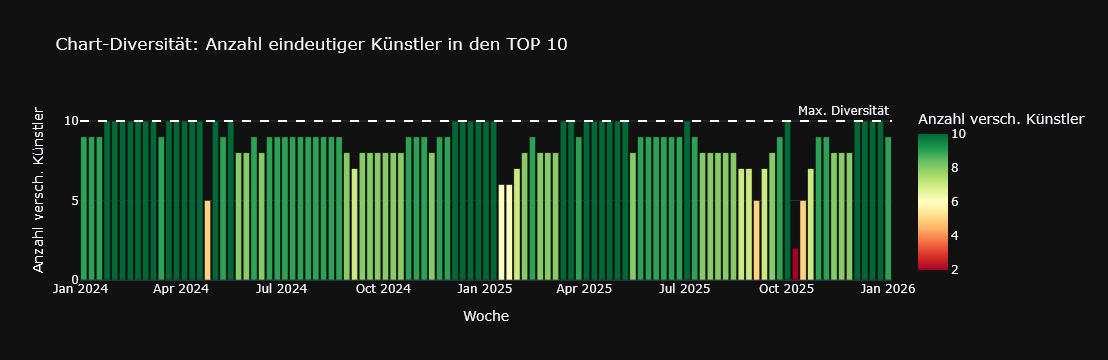

In [23]:
# Marktdynamik sichtbar machen: Anzahl der eindeutigen Künstler pro Woche in den TOP 10
diversity_analysis = df[df['rank'] <= 10].groupby('chart_week')['artist_names'].nunique().reset_index()
diversity_analysis.columns = ['chart_week', 'unique_artists']

# Visualisierung als Bar-Chart (diskrete Zählwerte)
fig_div = px.bar(diversity_analysis, 
                 x='chart_week',
                 y='unique_artists',
                 title='Chart-Diversität: Anzahl eindeutiger Künstler in den TOP 10',
                 labels={
                     'unique_artists': 'Anzahl versch. Künstler',
                     'chart_week': 'Woche'
                 },
                 template='plotly_dark',
                 color='unique_artists',
                 color_continuous_scale='RdYlGn') # Rot = Monoton, Grün = Divers

# Schwellenwertlinie hinzufügen (Maximum 10)
fig_div.add_hline(y=10, line_dash='dash', line_color='white', annotation_text='Max. Diversität')

fig_div.show()
    


## Zusammenfassung der Ergebnisse

### Das Wechselspiel zwischen Volumen und Vielfalt

Die Grafiken zeigen zwei völlig unterschiedliche Arten von Markt-Peaks:

#### 1. Der "Superstar-Effekt" (Monokultur-Peaks)

Im **April 2024** und besonders markant im **Oktober 2025** sehen wir massive Ausschläge im Streaming-Volumen.

**Interpretation:** Während das Volumen nach oben schießt, bricht die Diversität in der zweiten Grafik zeitgleich ein (der rote Balken im Okt 2025 zeigt nur ca. 2–3 verschiedene Künstler in den Top 10).

**Ergebnis:** Ein einzelner "Blockbuster"-Release (wie Taylor Swift) dominiert den Markt so stark, dass fast alle Top-Plätze von derselben Person belegt werden. Das Gesamtvolumen steigt, aber die Vielfalt kollabiert.

#### 2. Die "Saisonale Katalog-Dominanz" (Weihnachten)

Um den **Januar 2025** und **Januar 2026** herum sehen wir die höchsten Volumen-Peaks des Jahres.

**Interpretation:** Die Diversität sinkt hier ebenfalls (gelbe/hellgrüne Bereiche), aber nicht so extrem wie bei den Superstar-Releases.

**Ergebnis:** An Weihnachten konzentriert sich die Welt auf eine Handvoll bekannter Klassiker (Mariah Carey, Wham! etc.). Es ist ein kollektives, vorhersehbares Nutzerverhalten, das den Markt jährlich "monotoner" macht.

### Die "Gesunde" Marktphase (Sommer-Plateaus)

Zwischen **Juli und September** (sowohl 2024 als auch 2025) zeigt sich ein stabileres Bild:

**Volumen:** Die Kurve ist flacher, ohne extreme Ausreißer nach oben.

**Diversität:** Die Balken in der zweiten Grafik sind fast durchgehend dunkelgrün und berühren die **"Max. Diversität"** Linie (10 verschiedene Künstler).

**Ergebnis:** Der Sommer ist die Zeit des Wettbewerbs. Viele verschiedene Künstler teilen sich die Top-Plätze. Es gibt keinen einzelnen Dominator, was auf eine organische und vielfältige Musiknutzung hindeutet.

# WACHSTUMSRATEN DER KÜNSTLER 
## (ROLLING MEANS & GROWTH RATE)

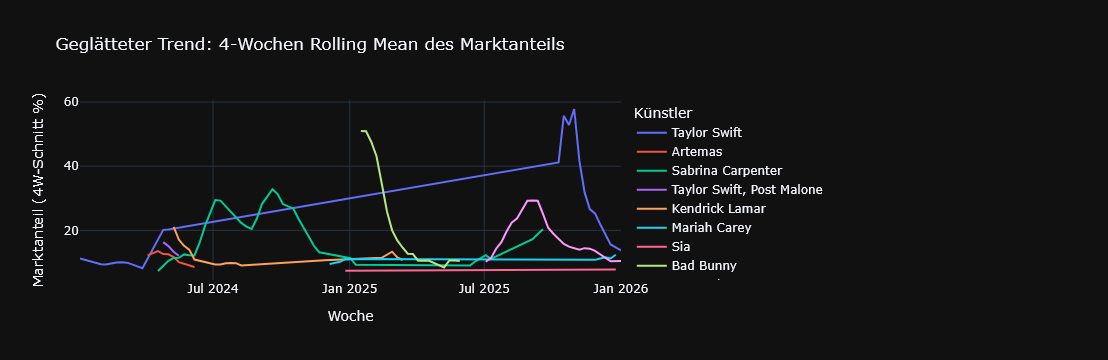

In [24]:
# Auf TOP 10 jeder Woche filtern, um die Marktführer zu isolieren
top_10_weekly = df[df['rank'] <= 10].copy()

# Summe der Streams in den TOP 10 pro Woche berechnen
weekly_top10_sum = top_10_weekly.groupby('chart_week')['streams'].transform('sum')

# Prozentualen Anteil berechnen (Stream Share)
artist_dominance = top_10_weekly.groupby(['chart_week', 'artist_names'])['streams'].sum().reset_index()

# Wöchentliche Summe mappen, um den Anteil zu berechnen
weekly_total = top_10_weekly.groupby('chart_week')['streams'].sum()
artist_dominance['stream_share'] = artist_dominance.apply(
    lambda row: (row['streams'] / weekly_total[row['chart_week']]) * 100, axis=1
)

# Konzentration auf die TOP-Künstler
top_artist_list = artist_dominance.groupby('artist_names')['streams'].mean().nlargest(10).index
df_growth = artist_dominance[artist_dominance['artist_names'].isin(top_artist_list)].copy()

# ROLLING MEAN (Gleitender Mittelwert über 4 Wochen) berechnen, um kurzfristige Peaks zu glätten und den Basistrend zu sehen
df_growth['rolling_avg'] = df_growth.groupby('artist_names')['stream_share'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean()
)

# Wachstumsrate: Prozentuale Veränderung zur Vorwoche
# Dynamik zeigen: Wer gewinnt an Fahrt?
df_growth['growth_rate'] = df_growth.groupby('artist_names')['stream_share'].transform(
    lambda x: x.pct_change() * 100   # pct_change() berechnet die prozentuale Veränderung von einem Element zum nächsten
)

# Cleanup: Unendliche Werte (durch Division durch 0) durch 0 ersetzen für Stabilität in der Grafik und später im Modell
df_growth['growth_rate'] = df_growth['growth_rate'].replace([float('inf'), -float('inf')], 0).fillna(0)

# Visualisierung der Trends (Rolling Means): Welche Künstler haben nachhaltige Marktdominanz anstatt nur einen kurzen Flash?
fig_rolling = px.line(df_growth, 
                      x='chart_week', 
                      y='rolling_avg', 
                      color='artist_names',
                      title='Geglätteter Trend: 4-Wochen Rolling Mean des Marktanteils',
                      labels={
                          'rolling_avg': 'Marktanteil (4W-Schnitt %)', 
                          'artist_names': 'Künstler',
                          'chart_week': 'Woche'
                      },
                      template='plotly_dark')

fig_rolling.show()


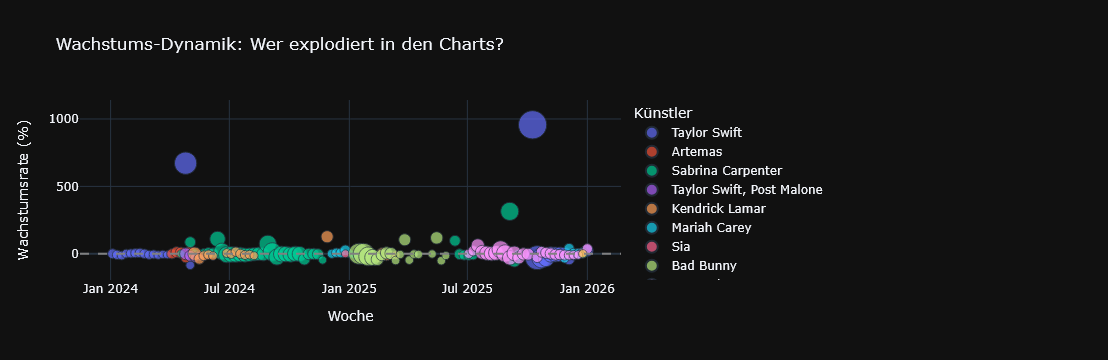

In [25]:
# Analyse der Wachstumsexplosionen, um "Breakout-Momente" zu identifizieren
# Auf extreme Sprünge (> 50% Wachstum) filtern, um Rauschen zu vermeiden.
breakouts = df_growth[df_growth['growth_rate'] > 50]

fig_growth = px.scatter(df_growth, 
                        x='chart_week', 
                        y='growth_rate', 
                        color='artist_names',
                        size='stream_share', # Größere Punkte = mehr Streams
                        title='Wachstums-Dynamik: Wer explodiert in den Charts?',
                        labels={
                            'growth_rate': 'Wachstumsrate (%)', 
                            'chart_week': 'Woche',
                            'artist_names': 'Künstler'
                        },
                        template='plotly_dark')

# Markiere die 0%-Linie
fig_growth.add_hline(y=0, line_dash="dash", line_color="gray")

fig_growth.show()

## Zusammenfassung der Ergebnisse

### Nachhaltigkeit vs. Hype (Rolling Mean)

Der **4-Wochen Rolling Mean** glättet das wöchentliche "Rauschen" und legt die echten Karrieretrends offen:

* **Plateau-Bildung:** Künstler wie **Sabrina Carpenter** (Sommer 2024) zeigen einen kontinuierlichen Anstieg des Marktanteils auf ca. 30%, gefolgt von einer stabilen Phase. Dies deutet auf eine nachhaltige Etablierung im Mainstream hin.
* **Peak-Verfall:** Im Gegensatz dazu fallen Event-getriebene Kurven (wie die von Taylor Swift im Okt 2025) nach dem initialen Peak von fast **60% Marktanteil** steil ab, was den typischen Lebenszyklus eines Blockbuster-Releases widerspiegelt.

### Marktdynamik & Breakout-Events (Scatter Plot)

Der Scatter Plot zur **Wachstums-Dynamik** zeigt deutlich, wie unterschiedlich Künstler an Fahrt gewinnen:

* **Virale Explosionen:** Wir identifizieren extreme Wachstums-Ausreißer (Punkte weit über der 0%-Linie), wie z. B. bei **Taylor Swift** im April 2024 und Oktober 2025. Diese Sprünge von über **500% bis 1000%** innerhalb einer Woche markieren keine organischen Trends, sondern massive globale Events.
* **Volumen vs. Geschwindigkeit:** Die Größe der Punkte verdeutlicht, dass etablierte Künstler (große Punkte) oft geringere Wachstumsraten haben, während Newcomer (kleinere Punkte) explosionsartige Sprünge machen können.
